In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [ ]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

dataset = data.to_numpy()

dataset

In [21]:
# Dimensions of the SOM grid
m = 1
n = 10

# # Number of training examples
# n_x = 3000
# rand = np.random.RandomState(0)
# # Initialize the training data
# train_data = rand.randint(0, 255, (n_x, 3))

# Initialize the SOM randomly
SOM = rand.randint(0, 50, (m, n, 4)).astype(float)

SOM

array([[[32.,  6., 33.,  0.],
        [ 3., 41., 47.,  5.],
        [44., 34.,  1., 39.],
        [11., 13., 12., 12.],
        [17., 41., 25., 43.],
        [35., 26., 34.,  8.],
        [42.,  7., 13.,  8.],
        [26., 19., 47., 30.],
        [11., 49., 35., 19.],
        [22., 36., 19., 47.]]])

In [31]:
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord

    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM

    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            # Gaussian dist func
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    


def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, epochs = 10):    
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, learn_rate, radius_sq, (g,h))           
    return SOM

In [33]:
alpha = 0.1
radius_square = 1
max_epoch = 20

SOM = train_SOM(SOM, dataset, learn_rate=alpha, radius_sq=radius_square, epochs=max_epoch)
print(SOM)


[[[0.24242741 0.67223571 0.07912897 0.06985704]
  [0.19146615 0.59014846 0.07188968 0.06475928]
  [0.15419286 0.47353364 0.10070161 0.08473535]
  [0.2402027  0.35828212 0.29351586 0.25780741]
  [0.39330618 0.31954491 0.52381358 0.46811944]
  [0.47413446 0.34349512 0.61094668 0.56302495]
  [0.51519093 0.36993827 0.64924651 0.64101533]
  [0.58058632 0.39656543 0.69402353 0.71717582]
  [0.69215505 0.42656197 0.77245763 0.79296774]
  [0.77017517 0.4460216  0.83544161 0.83662194]]]


In [ ]:
!pip install minisom

In [41]:
from minisom import MiniSom

lsom = MiniSom(1, 10, 4, sigma=0.81, neighborhood_function='gaussian')
lsom.train_random(dataset, 20)

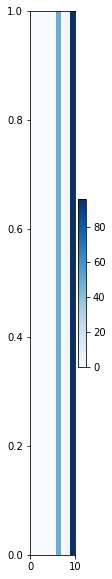

In [44]:
plt.figure(figsize=(1,10))
freq = np.zeros((1,10))
for pos, values in lsom.win_map(dataset).items():
  freq[pos[0], pos[1]] = len(values)

plt.pcolor(freq, cmap='Blues')
plt.colorbar()
plt.show()